#📈 Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

⚠ **Note:** this is not a financial advise.

Let's write some TensorFlow code to predict the price of Bitcoin based on the
historical price of Bitcoin.
Links:

* All resources: https://github.com/mrdbourke/tensorflow-deep-learning

* Book version of actual code/text :https://dev.mrdbourke.com/tensorflow-deep-learning/

## Get data 

We're going to be using the historical price data of Bitcoin to try and predict the future price of  Bitcoin, we downloaded the data from here: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

In [223]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-10-03 11:29:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-10-03 11:29:07 (7.21 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Importing time series with pandas

In [215]:
# Import with pandas
import pandas as pd

# Let's read in our Bitcoin daa and parse the dates
# la funcion read_csv tiene un parametro llamado parse_dates, debemos pasarle la columna que contenga las fechas
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=["Date"],
                  index_col= ["Date"]) # pass the date column and tell pandas column 1 is a datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [217]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [218]:
# How many samples do we have?

len(df)

2787

We've collected the historical price of bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples(where lots and lots can thousands to tens  of thousands to millions)

A smaller number of samples is something you'll often run into with time series problems.

>🔑 ** Note: ** The **seasonality** pf a time series dataset is referred  as the number of samples per year. So for our Bitcoin data, it has  seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [219]:
8*365

2920

In [220]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [221]:
# Only want closing price for each day

bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


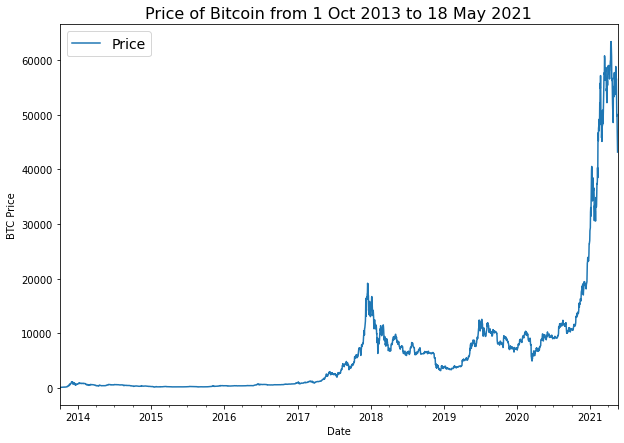

In [222]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")

plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)

plt.legend(fontsize=14);


## Importing time series data with Python's CSV module


In [ ]:
# Importing and formating historical Bitcoin data with Python

import csv

from datetime import datetime

timesteps = []

btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  # lo usaremos para saltarons las primera linea
  next(csv_reader) # skip firsst line (this gets rid of the column titles)
  for line in csv_reader:
    #timesteps.append(line[1])
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not string)
    btc_price.append(float(line[2])) # get the closing price as float

  
# View first 10 of each

timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

No handles with labels found to put in legend.


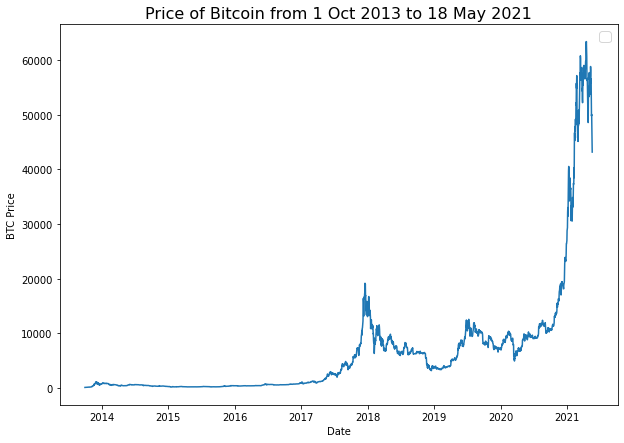

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timesteps,
         btc_price)

plt.ylabel("BTC Price")

plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)

plt.xlabel("Date")
plt.legend(fontsize=14);




## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)



In [ ]:

bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,#dates
                                                    prices, # BTC prices,
                                                    test_size = 0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((2229,), (558,), (2229,), (558,))

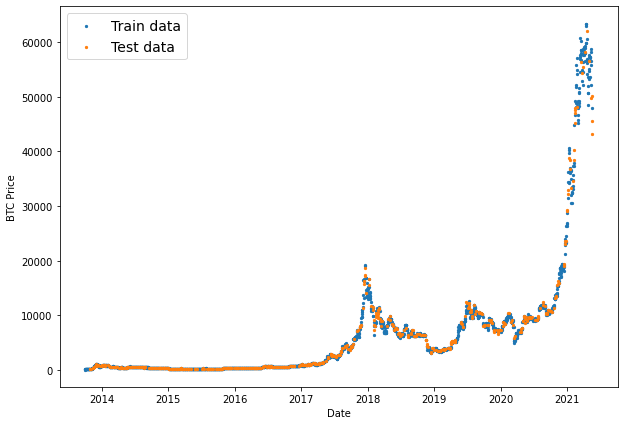

In [ ]:
# Let's plot wrong train and test splits

plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

plt.legend(fontsize=14)
plt.show();


## Create train & test sets for time series (the right way)

In [ ]:
# Create train and test splits the right way for time series data

split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5 

# Create train data split(everything before the split)

X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits(everything beyond the split)

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

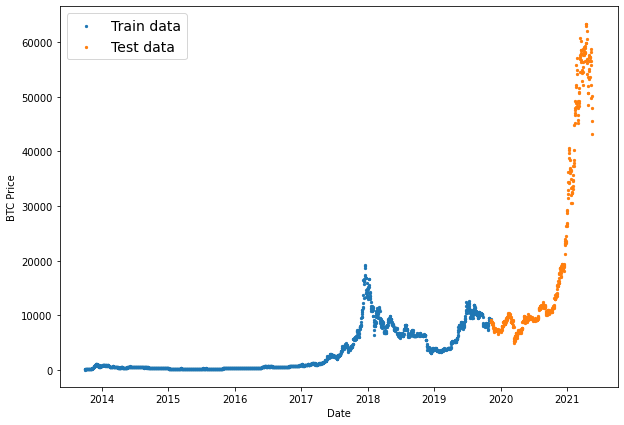

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

plt.legend(fontsize=14)
plt.show();

## Create a plotting function
Typing plotting code is tedios, let's functionize it.

In [ ]:
# Create a function to plot time series data
#". el punto hace referencia que por defecto sera scater"
def plot_time_series(timesteps, values, format=".",start=0, end=None, label=None):
    """
    PLots timesteps (a series of point in time) againts values(a series of values across timesteps)


    Parameters
    ----------
    timesteps : array of timestep values

    values : array of values across time

    format : style of plot, default "."

    start : where to start the plot (setting a value will index from start of timesteps & values)

    end: where to end the plot ( similar to start but for the end)

    label : label to show on plot about values, default None







    """


    # Plot the series
   
    plt.plot(timesteps[start:end], values[start:end], format, label = label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
      plt.legend(fontsize=14) # make label bigger
    plt.grid(True)



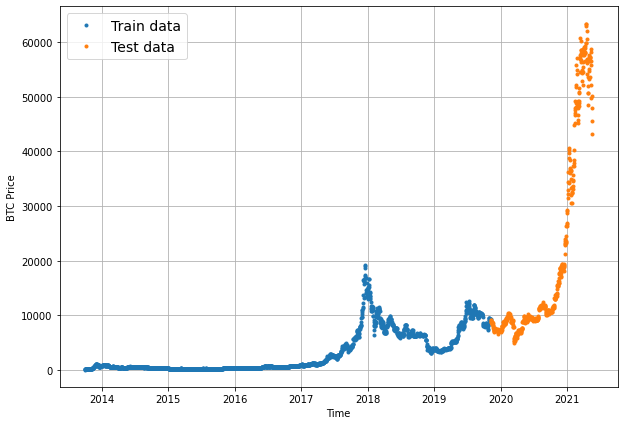

In [ ]:
# Test out plotting function
plt.figure(figsize=(10, 7))
# creamos una figura y luego los plots
plot_time_series(timesteps=X_train, values = y_train, label="Train data")
plot_time_series(timesteps= X_test, values=y_test, label = "Test data" )


## Modelling Experiments

We've got some Bitcoin historical data,  to model it, let's run a series of modelling experiment and see which model performs best.

Terms to be familiar with:

* **Horizon** = number of timesteps into the future we're going to predict
* **window size** = number of timesteps we're going to use to predict **horizon**



Modelling experiments we're running:
* 0	Naïve model (baseline)	
* 1	Dense model, horizon =1, window= 7
* 2	Same as 1, horizon= 1, window = 30
* 3	Same as 1,	 horizon=7, window =	30	
* 4	Conv1D	1	7	NA
* 5	LSTM	1	7	NA
* 6	Same as 1 (but with multivariate data)	1	7	Block reward size
* 7	N-BEATs Algorithm	1	7	NA
* 8	Ensemble (multiple models optimized on different loss functions)	1	7	NA
* 9	Future prediction model (model to predict future values)	1	7	NA
* 10	Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast(baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the  value at timestep t-1 (previous timestep) - this is for a horizon of 1.


In [ ]:
y_test

array([ 9226.48582088,  8794.35864452,  8798.04205463,  9081.18687849,
        8711.53433917,  8760.89271814,  8749.52059102,  8656.97092235,
        8500.64355816,  8469.2608989 ,  8537.33965197,  8205.80636599,
        8118.4885358 ,  8074.84317361,  7612.7405735 ,  7262.11053495,
        7303.40575852,  7041.73293642,  7211.86180875,  7141.06944869,
        7523.4806726 ,  7390.20746923,  7729.26593894,  7542.23560864,
        7381.96300782,  7333.43293049,  7315.36776456,  7213.73376172,
        7398.78704961,  7511.88058312,  7532.12351309,  7550.23919987,
        7333.09604316,  7239.76257544,  7198.06667705,  7190.27236926,
        7238.87432299,  7087.02498535,  7112.73147612,  6883.49639377,
        6584.02884335,  7424.01540023,  7147.56832379,  7139.93337053,
        7286.33508116,  7236.98620461,  7166.17237853,  7235.6266505 ,
        7212.80939522,  7183.70653603,  7227.29371168,  7311.56064392,
        7385.46484791,  7251.27679432,  7179.95781929,  7174.74401195,
      

In [ ]:
y_test[:-1]

array([ 9226.48582088,  8794.35864452,  8798.04205463,  9081.18687849,
        8711.53433917,  8760.89271814,  8749.52059102,  8656.97092235,
        8500.64355816,  8469.2608989 ,  8537.33965197,  8205.80636599,
        8118.4885358 ,  8074.84317361,  7612.7405735 ,  7262.11053495,
        7303.40575852,  7041.73293642,  7211.86180875,  7141.06944869,
        7523.4806726 ,  7390.20746923,  7729.26593894,  7542.23560864,
        7381.96300782,  7333.43293049,  7315.36776456,  7213.73376172,
        7398.78704961,  7511.88058312,  7532.12351309,  7550.23919987,
        7333.09604316,  7239.76257544,  7198.06667705,  7190.27236926,
        7238.87432299,  7087.02498535,  7112.73147612,  6883.49639377,
        6584.02884335,  7424.01540023,  7147.56832379,  7139.93337053,
        7286.33508116,  7236.98620461,  7166.17237853,  7235.6266505 ,
        7212.80939522,  7183.70653603,  7227.29371168,  7311.56064392,
        7385.46484791,  7251.27679432,  7179.95781929,  7174.74401195,
      

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

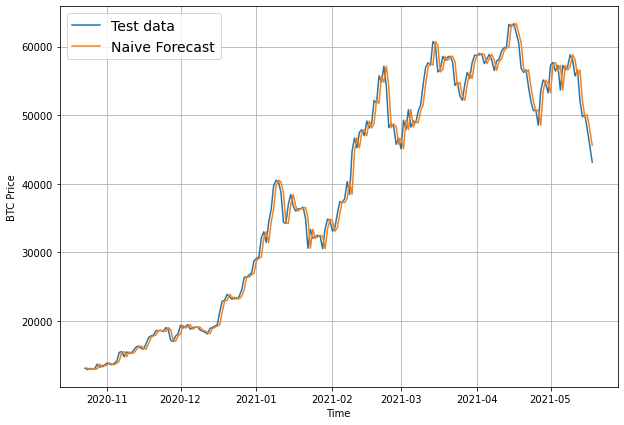

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))

# plot_time_series(timesteps=X_train, values=y_train, label="Train data" )

plot_time_series(timesteps=X_test, values = y_test,start=350, format="-", label ="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=350, format="-", label="Naive Forecast")

> 🛠 **Exercise:** Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat. does the term augoregressive come up?

## Evaluating a time series model

let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics( which can also be used for time series forecasting):
* MAE - mean absolute error

* MSE - mean squared error

* RMSE - root mean square error

* MAPE/sMAPE - (symmetric) mean absolute percentage error

* MASE - mean absolute scaled error

For all of the above metrics, ** lower is better **, for example, an MAE of 0 that is better than an MAE of 100.


The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values ( y_true or ground truth values)?**


In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation

def mean_absolute_scaled_error(y_true, y_pred):
  """
  
  
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]- y_true[:-1]))# our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season





In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics


def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluations metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  rmse = tf.sqrt(mse)

  mape =  tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()
          }






That's one good looking evaluation function

Let's now see if it works..

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts


In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#modelling-experiments

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week

[0, 1, 2, 3, 4, 5, 6]-->[7]
[1, 2, 3, 4, 5, 6, 7]-->[8]
[2, 3, 4, 5, 6, 7, 8]-->[9]

```



In [ ]:
X_train

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2019-11-05T00:00:00.000000000', '2019-11-06T00:00:00.000000000',
       '2019-11-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
len(y_train)

2229

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this {btc_price[7]}")


We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this 123.033


In [ ]:
# Let's setup global variables for window and horizon size

HORIZON = 1 # predict next 1 day

WINDOW_SIZE = 7 # use the past week to Bitcoin data to make the prediction


In [ ]:
# Create function to label windowed data

def get_labelled_windows(x, horizon =HORIZON):

  """
  Create labels for windowed dataset.

  E.g. if  horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] ---> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  
  
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function

test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis =0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> , label ={tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> , label =7


In [ ]:
tf.expand_dims(tf.range(8)+1, axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [ ]:
btc_price[:20]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883]

we've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

we could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing
-https://numpy.org/doc/stable/reference/arrays.indexing.html


Our function will:

1. Create a window step of specific window size (e.g [0, 1, 2, 3, 4, 5, 6])

2. Use NumPy indexing to create a 2D array of multiple  window's steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6],

 [1, 2, 3, 4, 5, 6, 7],

 [2, 3, 4, 5, 6, 7, 8]]



```

3. Uses the 2D array of multiple window steps (from 2.) to index on a target series(e.g the historical price of Bitcoin)

4. Used our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

> **Resource:** The function we're about to create has been adapted from the following article:

https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5





In [ ]:
import numpy as np

# Create function to view NumPy arrays as windows


def make_windows(x, window_size = WINDOW_SIZE, horizon=HORIZON):
  """"
  
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  
  """

  # 1. Create a window of specific window_size(add the horizon on the end for labelling later)

  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)
  # 2. Create a  2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size

  print(f"Window indexes: \n {window_indexes, window_indexes.shape}")


  # 3. Index on the target array (a time series) with 2D array of multiple window steps

  windowed_array = x[window_indexes]

  #print(windowed_array)

  # 4. Get the labelled windows

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels




In [271]:
prices.shape

(2787,)

In [273]:
np.array(btc_price_turkey).shape

(2787,)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window indexes: 
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [ ]:
np.expand_dims(np.arange(8), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [ ]:
prices[:7]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [ ]:
len(prices)

2787

In [ ]:
# View the first 3 windows/labels

for i in range(3):
  print(f"window: {full_windows[i]}--> Label {full_labels[i]}")


window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]--> Label [123.033]
window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]--> Label [124.049]
window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]--> Label [125.96116]


In [ ]:
# View the last 3 windows/labels

for i in range(3):
  print(f"Window: {full_windows[i-3]} ---> label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] ---> label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] ---> label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] ---> label: [43144.47129086]


In [ ]:
prices[-1]

43144.471290860296

## Turning windows into  training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Make the train/test splits

def make_train_test_splits(windows, labels, test_split=0.2):

  """
  Splits matching pairs of windows and labels into train and test splits.

  
  """


  split_size = int(len(windows)*(1 - test_split))# this will default to 80% train/ 20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels



In [ ]:
# Create train and test windows

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
len(full_windows) * 0.8

2224.0

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
train_labels.shape

(2224, 1)

In [ ]:
# check to see if train labels are the same(before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback
Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best perfomances againts the other model's best performances

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback the following:



In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, # only output a limited amount of  text
                                            save_best_only=True)

## Model 1: Dense model(window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:

* A single dense layer with 128 hidden units and RelU
* An output layer with linear activation(no activation)

* Adam optimization and MAE loss function

* Batch size of 128 (previously we've used 32)

* 100 epochs

Why these values?

I picked them out of experimentation

* *hyperparameters* = values a machine learning practitioner (you) can adjust themselves

* *parameter, weights, patterns* = values a model learns on its own

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers

# Set random seed for as reproducible resuts as possible

tf.random.set_seed(42)

# 1. Construct model

model_1 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
                               

], name ="model_1_dense") # name our model so we can save it

# 2. Compile

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]
            )

Epoch 1/100
18/18 [==============================] - 3s 15ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
INFO:tensorflow:Assets written to: model_ex

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [ ]:
# Load in saved best perfoming model_1 and evaluate it on test data

model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")

model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only pseudo forecasts because actual forecasts are into the future), let's write a function to:


1. Take in a train model

2. Takes in some inputs data ( same kind of data the model was trained on)

3. Passes the input data to the model's `predict()` method

4. Returns the predictions








In [ ]:
def make_preds(model, input_data):

  """
  Uses model to make predictions input_data.

  
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

  



In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)

len(model_1_preds), model_1_preds[:10]


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [ ]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [ ]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [ ]:
# Evaluate preds

model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
X_test[:10]

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
test_windows[:5]

array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
        9335.75240233, 9226.48582088, 8794.35864452],
       [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
        9226.48582088, 8794.35864452, 8798.04205463],
       [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
        8794.35864452, 8798.04205463, 9081.18687849],
       [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
        8798.04205463, 9081.18687849, 8711.53433917],
       [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
        9081.18687849, 8711.53433917, 8760.89271814]])

In [ ]:
test_labels.shape

(556, 1)

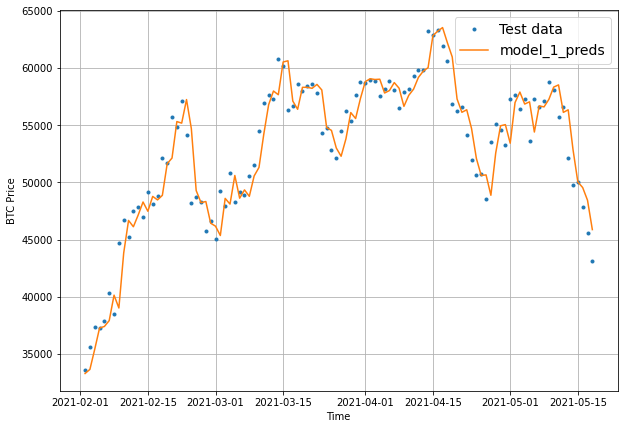

In [ ]:
# Let's plot our model 1 predictions

offset = 450

plt.figure(figsize=(10, 7))

# Account for the test_windows offset and index into test_labels to ensure correc plotting

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")


## Model 2: Dense(window=30, 1)

In [ ]:
HORIZON = 1 # predict one step at a time(one day of Bitcoin prices)

WINDOW_SIZE = 30 # use 30 timesteps in past

In [ ]:
# Make windowed data with appropriate horizon and window sizes

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

len(full_windows), len(full_labels)

Window indexes: 
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


(2757, 2757)

In [ ]:
# Make train and testing windows

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split= 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)


# Create model

model_2 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear")
                               


], name="model_2_dense")

# Compile

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_2.name)]
            )



INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate model 2 on test data

model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [ ]:
# Load in the best perfoming model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")

model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [ ]:
# Get forecast predictions

model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([552]), TensorShape([552]))

In [ ]:
# Get forecast predictions

model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
# Evaluate results for model 2 predictions

model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred=model_2_preds)


model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mase': 1.0644706,
 'mse': 1281438.8,
 'rmse': 1132.0065}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

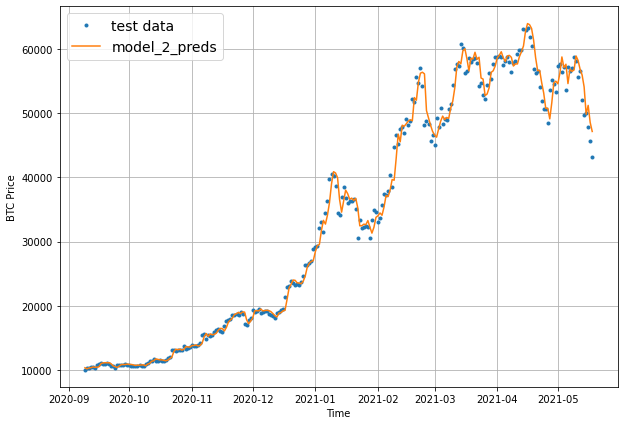

In [ ]:
offset = 300

plt.figure(figsize=(10, 7))

# Account for test_window offset when plotting

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")



In [ ]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [ ]:
## Model 3: Dense (window = 30, horizon = 7)

HORIZON = 7

WINDOW_SIZE= 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

len(full_windows), len(full_labels)

Window indexes: 
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and ouput sizes)

model_3 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)


                               ], name="model_3_dense")

# compile

model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate the model on the test data

model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1321.5204


1321.5203857421875

In [ ]:
# Load best version of model_3 and evaluate

model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [ ]:
# Make predictions with model_3

model_3_preds = make_preds(model_3,
                           input_data=test_windows)

model_3_preds[:3]

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9004.693 , 9048.1   , 9425.088 , 9258.258 , 9495.798 , 9558.451 ,
        9357.354 ],
       [8735.507 , 8840.304 , 9247.793 , 8885.6   , 9097.188 , 9174.329 ,
        9156.819 ],
       [8672.508 , 8782.388 , 9123.8545, 8770.37  , 9007.13  , 9003.87  ,
        9042.724 ]], dtype=float32)>

In [ ]:
model_2_preds

<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8946.987 ,  8967.846 ,  8820.251 ,  8615.828 ,  8485.796 ,
        8384.62  ,  8307.779 ,  8171.7837,  8217.465 ,  7839.1475,
        7362.372 ,  7241.6304,  7111.796 ,  7113.5005,  7151.548 ,
        7358.3726,  7538.3345,  7628.2505,  7645.4507,  7465.532 ,
        7427.5674,  7281.3496,  7320.0425,  7380.9897,  7541.0913,
        7543.9976,  7559.277 ,  7436.6606,  7194.823 ,  7270.3125,
        7158.4824,  7335.8135,  7157.4346,  7235.874 ,  6997.1646,
        6768.8145,  7112.848 ,  7281.9316,  7126.0693,  7329.239 ,
        7272.7   ,  7298.2246,  7298.364 ,  7241.621 ,  7221.504 ,
        7269.738 ,  7257.2427,  7432.153 ,  7370.5015,  7196.892 ,
        7278.008 ,  7004.284 ,  7208.716 ,  7309.1733,  7451.5786,
        7698.1133,  8025.408 ,  8096.417 ,  8007.9087,  8011.691 ,
        8135.064 ,  8216.163 ,  8226.957 ,  8601.827 ,  8900.414 ,
        8842.8545,  8964.692 ,  8932.719 ,  8815.342 ,  8676.93  ,
        8751.0

In [ ]:
model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mase': 1.0644706,
 'mse': 1281438.8,
 'rmse': 1132.0065}

In [ ]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [ ]:
# Evaluate  model_3 results

model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 
                                 y_pred=model_3_preds)

model_3_results

{'mae': array([ 513.60516 ,  355.0837  ,  327.17035 ,  358.5096  ,  420.53207 ,
         537.8537  ,  545.6606  ,  485.92307 ,  584.497   ,  687.3817  ,
         836.22675 ,  755.1572  ,  731.496   ,  775.33984 ,  567.95465 ,
         266.80865 ,  188.80225 ,  188.1077  ,  253.09529 ,  301.43365 ,
         151.10735 ,  196.81424 ,  191.46184 ,  231.65074 ,  143.6114  ,
         122.5904  ,  132.78844 ,  190.81166 ,  179.15967 ,  228.25941 ,
         314.44016 ,  379.0925  ,  278.3254  ,  295.34604 ,  299.38525 ,
         248.64983 ,  299.7565  ,  259.69363 ,  180.30574 ,  206.72887 ,
         374.62906 ,  144.85143 ,  142.33601 ,  131.1158  ,   93.940636,
          54.825542,   73.79415 ,  103.59989 ,  121.33378 ,  168.67215 ,
         183.90945 ,  152.253   ,  186.57137 ,  146.91316 ,  240.42961 ,
         351.00656 ,  540.9515  ,  549.15674 ,  521.2421  ,  526.85535 ,
         453.363   ,  257.98166 ,  277.29492 ,  301.82465 ,  455.71756 ,
         458.95975 ,  503.44427 ,  522.3119 

# Make our evaluation function work for larger horizons


In [ ]:
model_3_results["mae"].ndim

1

In [ ]:
model_2_results["mae"].ndim

0

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics


def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluations metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  rmse = tf.sqrt(mse)

  mape =  tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different iized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:

    mae = tf.reduce_mean(mae)
    mse  =tf.reduce_mean(mse)
    rmse =tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()
          }

In [ ]:
# Get model_3 results aggregated to single values
model_3_results= evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_3_preds)

model_3_results

{'mae': 1237.5063,
 'mape': 5.5588784,
 'mase': 2.2020736,
 'mse': 5405198.5,
 'rmse': 1425.7477}

In [ ]:
model_1_results, model_2_results, naive_results

({'mae': 568.95123,
  'mape': 2.5448983,
  'mase': 0.9994897,
  'mse': 1171744.0,
  'rmse': 1082.4713},
 {'mae': 608.9615,
  'mape': 2.7693386,
  'mase': 1.0644706,
  'mse': 1281438.8,
  'rmse': 1132.0065},
 {'mae': 567.9802,
  'mape': 2.516525,
  'mase': 0.99957,
  'mse': 1147547.0,
  'rmse': 1071.2362})

We've made and evaluated predictions with `model_3`, let's visualize, visualize, visualize


In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.693 , 9048.1   , 9425.088 , 9258.258 , 9495.798 , 9558.451 ,
        9357.354 ],
       [8735.507 , 8840.304 , 9247.793 , 8885.6   , 9097.188 , 9174.329 ,
        9156.819 ],
       [8672.508 , 8782.388 , 9123.8545, 8770.37  , 9007.13  , 9003.87  ,
        9042.724 ],
       [8874.398 , 8784.737 , 9043.901 , 8943.051 , 9033.478 , 9176.488 ,
        9039.676 ],
       [8825.891 , 8777.4375, 8926.779 , 8870.178 , 9213.232 , 9268.156 ,
        8942.485 ]], dtype=float32)>

In [ ]:
test_labels[:, 0]

array([ 8794.35864452,  8798.04205463,  9081.18687849,  8711.53433917,
        8760.89271814,  8749.52059102,  8656.97092235,  8500.64355816,
        8469.2608989 ,  8537.33965197,  8205.80636599,  8118.4885358 ,
        8074.84317361,  7612.7405735 ,  7262.11053495,  7303.40575852,
        7041.73293642,  7211.86180875,  7141.06944869,  7523.4806726 ,
        7390.20746923,  7729.26593894,  7542.23560864,  7381.96300782,
        7333.43293049,  7315.36776456,  7213.73376172,  7398.78704961,
        7511.88058312,  7532.12351309,  7550.23919987,  7333.09604316,
        7239.76257544,  7198.06667705,  7190.27236926,  7238.87432299,
        7087.02498535,  7112.73147612,  6883.49639377,  6584.02884335,
        7424.01540023,  7147.56832379,  7139.93337053,  7286.33508116,
        7236.98620461,  7166.17237853,  7235.6266505 ,  7212.80939522,
        7183.70653603,  7227.29371168,  7311.56064392,  7385.46484791,
        7251.27679432,  7179.95781929,  7174.74401195,  6955.48757967,
      

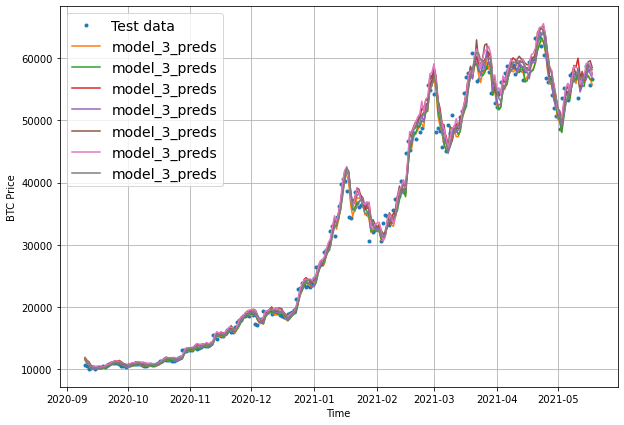

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_3_preds,
                 start=offset,
                 format="-",
                 label="model_3_preds")

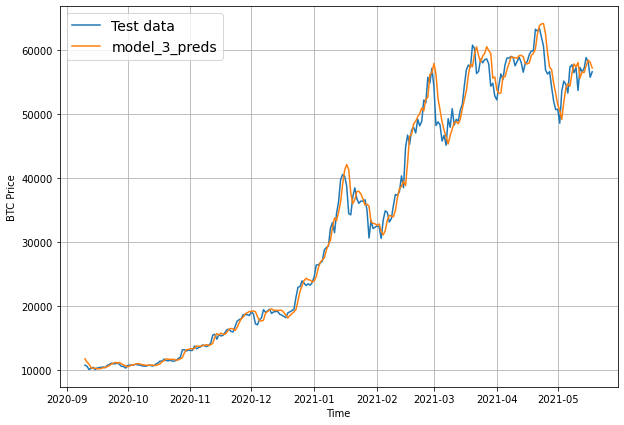

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

In [ ]:
model_3_preds[0], tf.reduce_mean(model_3_preds[0])

(<tf.Tensor: shape=(7,), dtype=float32, numpy=
 array([9004.693, 9048.1  , 9425.088, 9258.258, 9495.798, 9558.451,
        9357.354], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9306.82>)

## Which of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone...

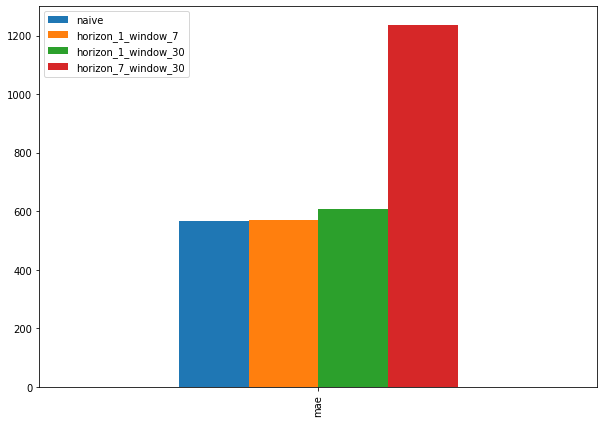

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index =["mae"]).plot(figsize=(10, 7), kind="bar");

**Note:** You miaght be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data, if a time series has it means the values a `t+ 1` (the next timestep) is typically close to the value at `t` ( the current timestep). In other words, today's value es probably pretty close to yesterday's value. Of course, this isn't always the case but when it is ( stock market prices often see autocorrelated but often fluctuate randomly). a naive model will often get fairly goo results



## Model 4: Conv1D

In [ ]:
HORIZON = 1 # predict next day of Bitcoin prices

WINDOW_SIZE = 7 # use previous week worth data

In [ ]:
# Create windowed data

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window indexes: 
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [ ]:
# Create train/test sets

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use  the Conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim)

However our data isn't in that shape yet...

In [ ]:
# Check data input shape

train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])


In [ ]:
expand_dims_layer  = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [ ]:
# Test out our lambda layer

print(f"original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output =  ...?

print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
x.numpy()

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [ ]:
tf.random.set_seed(42)

# Create Conv1D model

model_4 = tf.keras.Sequential([
                 layers.Lambda(lambda x: tf.expand_dims(x, axis =1)),
                 layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
                 layers.Dense(HORIZON)

], name ="model_4_conv1D")

# Compile model

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name= model_4.name)])



Epoch 1/100
18/18 [==============================] - 29s 16ms/step - loss: 1207.3817 - val_loss: 2320.6218
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 316.2171 - val_loss: 1467.2800
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 192.6853 - val_loss: 1164.7075
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 177.3535 - val_loss: 981.6695
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 172.3466 - val_loss: 960.8711
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 171.9754 - val_loss: 950.2025
I

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate model ...

model_4.evaluate(test_windows, test_labels)




18/18 [==============================] - 0s 4ms/step - loss: 610.1541


610.154052734375

In [ ]:
# Load back in best performing Conv1D and re-evaluate

model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D/")

model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 570.8284


570.8284301757812

In [ ]:
# Make predictions

model_4_preds = make_preds(model_4, test_windows)

model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.465, 8754.47 , 8983.928, 8759.672, 8703.628, 8708.294,
       8661.668, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)

model_4_results


{'mae': 570.8284,
 'mape': 2.5593357,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

## Model 5: RNN(LSTM)
Let's build an RNN model for our time series data.

We'll use the same data we created previously.



In [ ]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model wih the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)


outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name ="model_5_LSTM")

# Compile

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 2s 27ms/step - loss: 2430.3962 - val_loss: 9471.2334
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 653.4048 - val_loss: 1945.4351
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 217.8998 - val_loss: 993.6396
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 182.8415 - val_loss: 1053.0714
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 180.3832 - val_loss: 969.9512
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 177.2040 - val_loss: 993.2447
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 171.0069 - 

In [ ]:
# Load in best version of model 5 and evaluate on the test data

model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM/")

model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.0104


585.0104370117188

In [ ]:
# Make predictions with our LSTM model

model_5_preds = make_preds(model_5, test_windows)

model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8929.072, 8774.305, 8961.517, 8807.036, 8743.365], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions

model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)

model_5_results

                              

{'mae': 585.0104,
 'mape': 2.6282938,
 'mase': 1.0277011,
 'mse': 1226451.5,
 'rmse': 1107.4528}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

**Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature
we can use?


One feature we could add is whether or not Daniel Bourke tweeted on that day

* day 1 - 0

* day 2 - 1

* day 3 - 0


What's a better feature to use ?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [ ]:
# Let's make a multivariete time series
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# let's add the bitcoin halving events to our dataset

block_reward_1 = 50 # 3 January 2009 - this block reward isn's in our dataset ( or data starts from 01 October 2013)

block_reward_2 = 25 # 8 November 2012

block_reward_3 = 12.5 # 9 July 2016

block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")



In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
# Create data ranges of where specific block_rewards values should be

block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days


block_reward_3_days =(block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a block_reward column

bitcoin_prices_block = bitcoin_prices.copy()

bitcoin_prices_block["block_reward"] = None

# Add n block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4


In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [ ]:
bitcoin_prices_block.iloc[1500:1550]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5
2017-11-14,6666.27125,12.5
2017-11-15,6867.42625,12.5
2017-11-16,7259.30000,12.5
2017-11-17,7924.18250,12.5


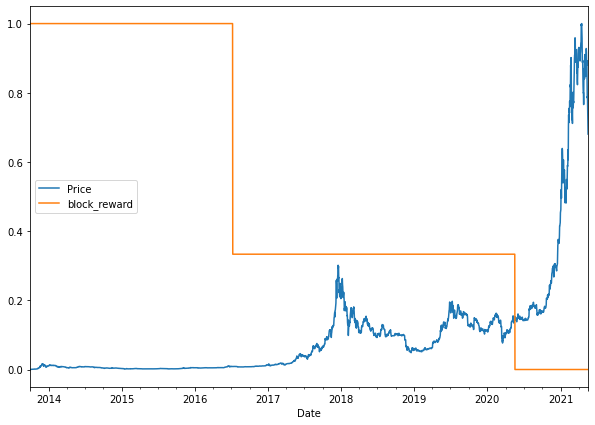

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize =(10, 7))


## Making a windowed dataset with Pandas


Previously, we've turned our univariate time series into windowed dataset using the helper funcitons above.


However, since we've got multivariate data, these function won't work.


Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [ ]:
# Setup dataset hyperparameter

HORIZON =1 

WINDOW_SIZE = 7


In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns

for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset
directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]





```



In [ ]:
# Create X(windows) and y (horizons) features

X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing

split_size = int(len(X)* 0.8)

X_train, y_train = X[:split_size], y[:split_size]

X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)


(2224, 2224, 556, 556)

In [ ]:
X_train, y_train, X_test, y_test

(            block_reward      Price+1  ...      Price+6      Price+7
 Date                                   ...                          
 2013-10-08          25.0   121.794998  ...   125.455002   123.654991
 2013-10-09          25.0   123.032997  ...   108.584831   125.455002
 2013-10-10          25.0   124.049004  ...   118.674660   108.584831
 2013-10-11          25.0   125.961159  ...   121.338661   118.674660
 2013-10-12          25.0   125.279663  ...   120.655327   121.338661
 ...                  ...          ...  ...          ...          ...
 2019-11-05          12.5  9202.415039  ...  9455.724609  9458.223633
 2019-11-06          12.5  9369.627930  ...  9225.995117  9455.724609
 2019-11-07          12.5  9326.599609  ...  9131.410156  9225.995117
 2019-11-08          12.5  9335.751953  ...  9197.632812  9131.410156
 2019-11-09          12.5  9226.485352  ...  9290.896484  9197.632812
 
 [2224 rows x 8 columns], Date
 2013-10-08     123.032997
 2013-10-09     124.049004
 20

## Model 6: Dense (multivariate time series)


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model

model_6 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                              #  layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name ="model_6_dense_multivariate")


# Compile

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 1234.6805 - val_loss: 2061.9080
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 351.5053 - val_loss: 1908.6729
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 235.4153 - val_loss: 1329.0585
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 208.6112 - val_loss: 1102.1340
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 196.5770 - val_loss: 1107.8472
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 187.2244 - val_loss: 1036.1722
INFO:tensorflow:Assets wri

In [ ]:
# Evaluate multivariate model

model_6.evaluate(X_test, y_test)


18/18 [==============================] - 0s 2ms/step - loss: 654.9892


654.9891967773438

In [ ]:
# Load in and evaluate best performing model

model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")

model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.5862


567.5862426757812

In [ ]:
# Make predictions with multivariate model

model_6_preds= tf.squeeze(model_6.predict(X_test))

model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.276, 8763.8  , 9040.486, 8741.225, 8719.326, 8765.071,
       8661.102, 8496.891, 8463.231, 8521.585], dtype=float32)>

In [ ]:
# Evaluate predictions to get eval metrics

model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)

model_6_results

{'mae': 567.5863,
 'mape': 2.5413754,
 'mase': 0.99709195,
 'mse': 1161687.2,
 'rmse': 1077.816}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

For a challenge on different ways to potentially improve the multivariate time series model, see the references here:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#modelling-experiments


## Model 7: N-BEAST algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well.) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in  figure one from the following paper: https://arxiv.org/pdf/1905.10437.pdf


Why?

* This will allow us to practice replicating a paper with Tensorflow code

* We will see how to use TensorFlow layer subclassing ( to make our own custom layers)

* Get experience using the Functional API to create a custom architecture

* Potentially get state of the art results on our






### BUilding and testing the N-BEATS block layer
Because the N-BEATS block layer doesn't exist in Tensorflow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https:/www.tensorflow.org/guide/keras/custom_layers_and_models




In [ ]:
# Create NBeatBlock custom layer

class NBeatsBlock(tf.keras.layers.Layer):

  def __init__(self, # the constructor takes all the hyperparameters for the layer
           input_size: int,
           theta_size: int,
           horizon: int,
           n_neurons: int,
           n_layers: int,
           **kwargs):# The **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons

    self.n_layers = n_layers


    # Block contains stack of 4 fully connected layers each has ReLu activation


    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    # Output of block is a theta layer with linear activation

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called

    x = inputs

    for layer in self.hidden:

      x = layer(x)

    theta = self.theta_layer(x)

    # Output the backcast and the forecast from tetha

    backcast, forecast = theta[:, :self.input_size], theta[:, - self.horizon:]

    return backcast, forecast

    



Let's test our NBeatsBlock class

To do we'll make some dummy inputs and outputs.

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs

dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE + HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
tf.random.set_seed(42)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)# input shape to the model has to reflect dense layer input requirments(ndim=2)

dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer

backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# There are the activation outputs of the theta layer( they'll be random due to no training of the model)

print(f"Backcast:{tf.squeeze(backcast.numpy())}")
print(f"Forecast:{tf.squeeze(forecast.numpy())}")

Backcast:[ 0.07960155  0.32512054 -0.84286827 -0.69389844 -0.31720546 -0.5698734
 -0.6396661 ]
Forecast:1.0071649551391602


##  Version del libro


In [ ]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer

backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960155  0.32512054 -0.84286827 -0.69389844 -0.31720546 -0.5698734
 -0.6396661 ]
Forecast: 1.0071649551391602


### Preparing data for N-BEATS algorithm using tf.data

To make our input data load as fast as possible we're going to be adherering to the performant data pipeline steps in the tf.data guide

https://www.tensorflow.org/guide/data_performance



In [ ]:
HORIZON =1 
WINDOW_SIZE = 7

In [ ]:
# Create N=BEATS data inputs( N-BEATS works with univariate time series)

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
## Add windowed columns

bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price + {i+1}"]=  bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels

X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)

y = bitcoin_prices_nbeats.dropna()["Price"]


# Make train and test sets

split_size = int(len(X) * 0.8)


X_train, y_train = X[:split_size], y[:split_size]

X_test, y_test = X[split_size:], y[split_size:]


len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data API

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)


# Combine labels and features by zipping together -> (features, labels)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))

test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch

BATCH_SIZE = 1024


train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up Hyperparameters for N-BEATS algorithm

The N_BEATS algorithm has a fair few number of parameters,
many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
# Values from N-BEATS paper

N_EPOCHS = 5000

N_NEURONS = 512

N_LAYERS = 4

N_STACKS = 30

INPUT_SIZE  = WINDOW_SIZE * HORIZON

THETA_SIZE  = INPUT_SIZE + HORIZON


INPUT_SIZE, THETA_SIZE 



(7, 8)

### Getting ready for residual connection

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).


The N-BEATS algorithm uses double residual stacking to help
train its deeper architecture ( section 3.2 of N-BEATS paper).



In [ ]:
# Make tensors

tensor_1 = tf.range(10) + 10

tensor_2 = tf.range(10)

# Subtract

subtracted = layers.subtract([tensor_1, tensor_2])


# Add

added = layers.add([tensor_1, tensor_2])


# Get outputs
print(f"Input tensor: {tensor_1.numpy()} & {tensor_2.numpy()}")

print(f"Subtracted: {subtracted.numpy()}")

print(f"Added: {added.numpy()}")

Input tensor: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

### Building, compiling and fitting the N-BEATS algorithm

 1. Setup an instance of the N-BEAtS Block layer using

 `NBeatsBlock` ( this's ll be the initial block used for the network, the rest will be created as part of stacks)

 2. Create an input layer for the N-BEATS stack ( we'll be using the Keras Functional API)

 3.  Make the initial backast and forecats for the model with the layer created in (1)


 4. Use for loop to create stacks of block layers

 5. Use `NBeatsBlock` class within the for loop in (4) to create block which return backcast and block-level forecasts

 6. Create the double residual stacking using subtract and add layers

 7. Put the model inputs and outputs together using `tf.keras.Model()`

 8. Compile the model with MAE loss( the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper

9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce Lr on Plateu - if a model stops improving, try
lowering the learning rate to reduce the amount it updates its weights each time ( Take smaller steps towards best perfomn)




In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons= N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBLock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name ="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)

residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers

for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)
  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals
  # 6. Create the double residual stacking
  residuals= layers.subtract([residuals, backcast], name=f"subtract_{i}")

  forecast= layers.add([forecast, block_forecast], name=f"add_{i}")
  # 7. Put the stack model together

model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name ="model_7_NBEATS")

  #8. Compile model with MAE loss

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateu callbacks

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)
                        ])



Epoch 00814: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00914: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 58s, sys: 10.8 s, total: 3min 9s
Wall time: 7min 12s


In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])




Epoch 00587: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 01013: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 01113: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 46s, sys: 14.5 s, total: 4min
Wall time: 9min 10s


In [ ]:
# Evaluate N-BEATS model on the test dataset

model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 42ms/step - loss: 578.7068 - mae: 578.7068 - mse: 1164776.1250


[578.706787109375, 578.706787109375, 1164776.125]

In [ ]:
# Make predictions with N-BEATS model

model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8846.003, 8786.683, 9021.319, 8758.232, 8760.558, 8746.423,
       8652.063, 8507.601, 8477.831, 8509.517], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model preds

model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)

model_7_results

{'mae': 578.7068,
 'mape': 2.6409287,
 'mase': 1.0166276,
 'mse': 1164776.1,
 'rmse': 1079.2479}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

Woah... eve with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as model_1 or the original naive forecast

This goes to show the power of smaller networks as well as the fact not all larger model are better suited for a certain type of data.


### Plotting the N-BEATS architecture we've created

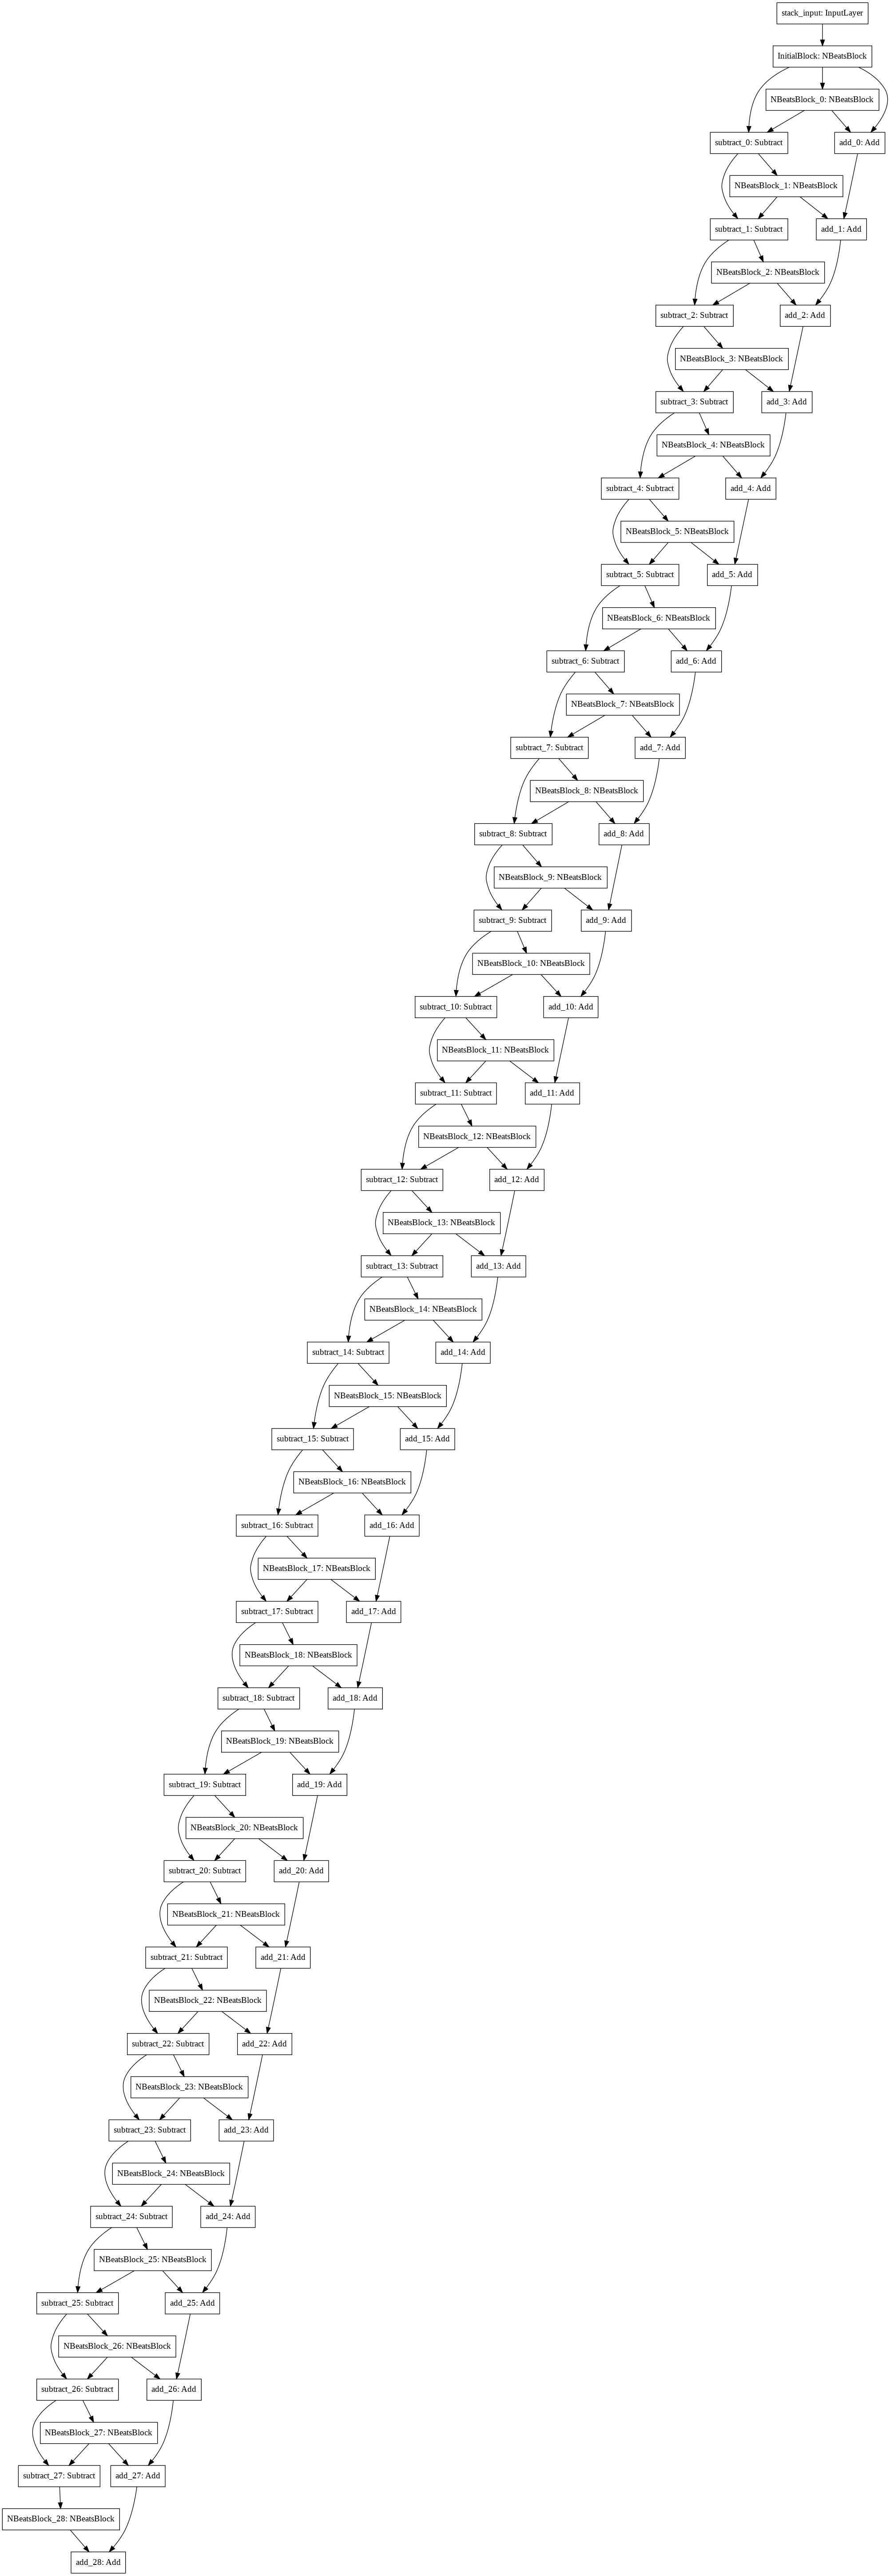

In [ ]:
# PLot the N-BEATS model and inspect the architecture

from tensorflow.keras.utils import plot_model

plot_model(model_7)

## Model 8: Creating an ensemble(stacking different models together)

 An ensemble laverages the wisdom of the crowd effect.

  It combines many *different* models to predict a common goal.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models(using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
  
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"])

  
  
  """

  # Make empty list for trained ensemble models
  ensemble_models= []
  # Create num_iter number of models per loss function

  for i in range(num_iter):

    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:

      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number:{i}")

      # Construct a simple model ( similar to model_1)

      model = tf.keras.Sequential([
        # Inialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128,kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
                            
      ])


      # Compile simple model with current loss function

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model

      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            restore_best_weights=True),
                           # LR = learning rate
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models

      ensemble_models.append(model)

  return ensemble_models 


  




In [ ]:
%%time
#Get list of trained ensemble models

ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)



Optimizing model by reducing: mae for 1000 epochs, model number:0
Optimizing model by reducing: mse for 1000 epochs, model number:0
Optimizing model by reducing: mape for 1000 epochs, model number:0
Optimizing model by reducing: mae for 1000 epochs, model number:1
Optimizing model by reducing: mse for 1000 epochs, model number:1
Optimizing model by reducing: mape for 1000 epochs, model number:1
Optimizing model by reducing: mae for 1000 epochs, model number:2
Optimizing model by reducing: mse for 1000 epochs, model number:2
Optimizing model by reducing: mape for 1000 epochs, model number:2
Optimizing model by reducing: mae for 1000 epochs, model number:3
Optimizing model by reducing: mse for 1000 epochs, model number:3
Optimizing model by reducing: mape for 1000 epochs, model number:3
Optimizing model by reducing: mae for 1000 epochs, model number:4
Optimizing model by reducing: mse for 1000 epochs, model number:4
Optimizing model by reducing: mape for 1000 epochs, model number:4
CPU t

In [ ]:
len(ensemble_models)

15

In [ ]:
ensemble_models

In [ ]:
!nvidia-smi

Sun Oct  3 10:43:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    61W / 149W |   1281MiB / 11441MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Make predictions with our ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions

def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time 

ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

ensemble_preds



CPU times: user 714 ms, sys: 48.4 ms, total: 763 ms
Wall time: 733 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[  12063.324 ,   12089.023 ,   12084.912 , ...,   75050.47  ,
          74038.84  ,   69428.93  ],
       [  -2419.7317,   -2430.6577,   -2799.8203, ...,  -16704.79  ,
         -16002.796 ,  -16345.833 ],
       [   9774.412 ,    9508.831 ,    9129.015 , ...,   53442.49  ,
          53263.234 ,   49385.6   ],
       ...,
       [  12810.975 ,   12454.557 ,   12400.33  , ...,   73159.664 ,
          74812.73  ,   70342.734 ],
       [ -29988.736 ,  -29742.496 ,  -29970.26  , ..., -174491.66  ,
        -166604.72  , -159389.55  ],
       [   7439.0737,    7442.7163,    7506.7783, ...,   39657.324 ,
          41030.89  ,   41629.977 ]], dtype=float32)>

In [ ]:
y_test

Date
2019-11-10     8798.042055
2019-11-11     9081.186878
2019-11-12     8711.534339
2019-11-13     8760.892718
2019-11-14     8749.520591
                  ...     
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, Length: 556, dtype: float64

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
# Evaluate ensemble model predictions

ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)

ensemble_results

{'mae': 13333.818,
 'mape': 66.514496,
 'mase': 23.423826,
 'mse': 1178004400.0,
 'rmse': 18115.305}

In [ ]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [192]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00211: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00513: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00613: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00251: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00595: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00695: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 00217: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00695: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00795: ReduceLROnPlateau reducing learning rate to 1.000000065687345

In [193]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8837.218 ,  8736.5205,  9037.927 , ..., 50167.44  , 48582.918 ,
        46593.02  ],
       [ 8741.725 ,  8730.732 ,  9000.964 , ..., 49627.727 , 48416.746 ,
        46822.33  ],
       [ 8794.759 ,  8784.19  ,  9075.913 , ..., 49376.21  , 48150.78  ,
        46439.844 ],
       ...,
       [ 8811.754 ,  8814.162 ,  9062.053 , ..., 49768.49  , 48533.83  ,
        45595.816 ],
       [ 8785.287 ,  8800.767 ,  8992.182 , ..., 49849.586 , 47949.61  ,
        47030.883 ],
       [ 8767.185 ,  8713.59  ,  9033.272 , ..., 49882.484 , 48785.797 ,
        45997.992 ]], dtype=float32)>

In [194]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 563.3363,
 'mape': 2.5635493,
 'mase': 0.9896259,
 'mse': 1141445.6,
 'rmse': 1068.3846}

In [195]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8792.203 ,  8767.201 ,  9047.371 ,  8720.782 ,  8749.277 ,
        8736.877 ,  8650.704 ,  8488.361 ,  8454.458 ,  8511.71  ,
        8201.965 ,  8101.3047,  8051.7334,  7617.1436,  7288.    ,
        7291.506 ,  7067.731 ,  7192.244 ,  7116.4316,  7520.4966,
        7403.404 ,  7741.799 ,  7571.633 ,  7396.877 ,  7321.39  ,
        7302.866 ,  7201.282 ,  7382.116 ,  7508.0073,  7541.185 ,
        7551.317 ,  7336.0786,  7230.383 ,  7174.628 ,  7172.198 ,
        7224.2725,  7083.5376,  7097.132 ,  6873.467 ,  6580.4604,
        7379.088 ,  7162.277 ,  7158.3574,  7281.2974,  7268.2275,
        7190.974 ,  7224.6934,  7204.9766,  7174.625 ,  7213.696 ,
        7302.201 ,  7384.9355,  7252.678 ,  7171.907 ,  7158.138 ,
        6944.2036,  7264.184 ,  7336.015 ,  7361.196 ,  7713.986 ,
        8071.446 ,  8141.385 ,  7859.806 ,  8084.818 ,  8094.3154,
        8164.111 ,  8113.8574,  8744.708 ,  8895.0205,  8771.556 ,
        8943.4

In [196]:
# Evaluate ensemble model predictions


ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)

ensemble_results

{'mae': 564.0671,
 'mape': 2.5625563,
 'mase': 0.99090964,
 'mse': 1141714.4,
 'rmse': 1068.5104}

In [197]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8792.203, 8767.201, 9047.371, 8720.782, 8749.277, 8736.877,
       8650.704, 8488.361, 8454.458, 8511.71 ], dtype=float32)>

Our ensemble preds come out in multiple dimenions but to combine into **point predictions** we can leverage the mean of all of the predictions of the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [198]:
# Evaluate ensemble model predictions


ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)

ensemble_results

{'mae': 563.3363,
 'mape': 2.5635493,
 'mase': 0.9896259,
 'mse': 1141445.6,
 'rmse': 1068.3846}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble


So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of bitcoin will be $50,000 USD


Wouldn't it be helpful if we knew range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for deep learning is the boostrap method:

1. Take the predictions from a number of randomly initialized
models (we've got this thanks to our ensemble models)

2. Measure the standard deviation of the predictions

3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)

4. To the get the prediction interval upper and lower bounds,add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/

In [199]:
tf.math.reduce_std(ensemble_preds, axis=0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 32.771317 ,  30.974657 ,  35.256283 ,  31.148426 ,  36.227013 ,
        41.815044 ,  27.322487 ,  23.623167 ,  25.49574  ,  19.194714 ,
        22.335194 ,  19.34413  ,  29.171238 ,  30.779972 ,  39.60493  ,
        37.660942 ,  30.018402 ,  39.710377 ,  45.459564 ,  47.733868 ,
        25.711302 ,  32.750885 ,  19.1875   ,  28.228252 ,  29.682991 ,
        37.075996 ,  17.487852 ,  19.97138  ,  15.1114435,  16.827969 ,
        16.9525   ,  18.21216  ,  20.241129 ,  24.690958 ,  14.165832 ,
        14.818486 ,  15.532083 ,  11.496008 ,  23.68315  ,  23.737549 ,
        58.241875 ,  38.493282 ,  61.265568 ,  51.2887   ,  67.61493  ,
        36.387768 ,  15.926445 ,  13.716195 ,  11.727672 ,  10.63477  ,
         9.555071 ,   9.118635 ,  12.968785 ,  14.228869 ,  17.560139 ,
        20.954119 ,  27.828758 ,  21.59877  ,  23.292192 ,  31.218098 ,
        34.55824  ,  28.754868 ,  28.8393   ,  28.586664 ,  38.07997  ,
        18.15326

In [200]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. take the predictions from a number of randomly initialized models

  # 2. Measure the standar deviation of predictions

  std = tf.math.reduce_std(preds, axis=0)



  # 3. Multiply the standard deviation by 1.96

  interval = 1.96 * std


  # 4. get the prediction interval upper and lower bounds

  preds_mean = tf.reduce_mean(preds, axis=0)

  lower, upper = preds_mean - interval, preds_mean + interval


  return lower, upper



In [201]:
# Get the upper and lower bounds of the 95% percent prediction interval

lower, upper = get_upper_lower(preds=ensemble_preds)

lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8727.972 ,  8706.491 ,  8978.269 ,  8659.731 ,  8678.272 ,
         8654.92  ,  8597.152 ,  8442.06  ,  8404.486 ,  8474.088 ,
         8158.188 ,  8063.39  ,  7994.5576,  7556.815 ,  7210.3745,
         7217.6904,  7008.895 ,  7114.4116,  7027.331 ,  7426.938 ,
         7353.01  ,  7677.607 ,  7534.0254,  7341.55  ,  7263.2114,
         7230.1973,  7167.006 ,  7342.972 ,  7478.3887,  7508.202 ,
         7518.09  ,  7300.383 ,  7190.71  ,  7126.234 ,  7144.433 ,
         7195.228 ,  7053.0947,  7074.5996,  6827.048 ,  6533.935 ,
         7264.9336,  7086.83  ,  7038.277 ,  7180.7715,  7135.702 ,
         7119.6543,  7193.4775,  7178.093 ,  7151.6387,  7192.8516,
         7283.473 ,  7367.063 ,  7227.2593,  7144.0186,  7123.72  ,
         6903.1333,  7209.6396,  7293.6816,  7315.543 ,  7652.7983,
         8003.7114,  8085.0254,  7803.2812,  8028.788 ,  8019.6787,
         8128.5303,  8075.826 ,  8672.823 ,  8844.308 ,  8708.801 ,

In [202]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

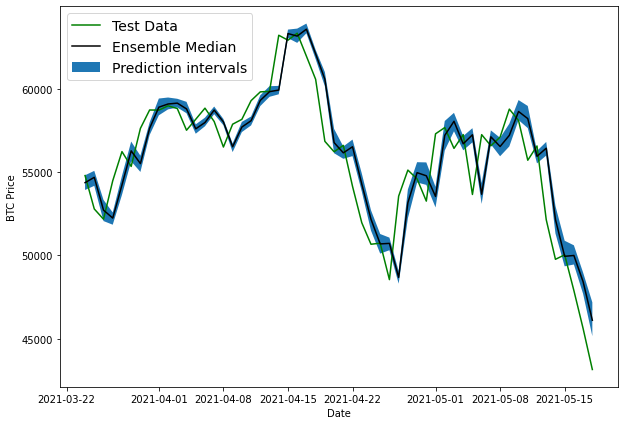

In [203]:
# Get the median/mean values of our ensemble preds

ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the predictions intervals(where the predictions fall between)

offset=500
plt.figure(figsize=(10, 7))

plt.plot(X_test.index[offset:], y_test[offset:], "g",label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")

# To plot the upper and lower bounds, let's use fill_between

plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction intervals")
plt.legend(loc="upper left", fontsize=14);



hmmm...

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep

>🔑 **Note:** These prediction intervals are estimates themselves. And they have been created witth the assumption that our model's data is from a normal destribution.

## Aside: two types of uncertainty(coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know?(with perfect data, what's posible for a a model to learn?)

2. What doesn't my model know?(what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not? )

There are two major types of uncertainty in machine learning  you know about:

* **Aleatoric ** - this type of uncertainty cannot be reduced and it is often referred as data uncertainty or subway uncertainty

* **Epistemic uncertainty** -

this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset,
however, this is only a pseudofuture.


let's now build a model which is capable of predicting into the future!



In [206]:
HORIZON = 1

WINDOW_SIZE = 7

In [205]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [207]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [209]:
# Train model on entire data to make predictions for the next day
x_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()

# Get labels

y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(x_all), len(y_all)

(2780, 2780)

In [210]:
x_all[:10], y_all[:10]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866],
        [125.9275 , 125.27966, 125.96116, 124.049  , 123.033  , 121.795  ,
         120.65533],
        [126.38333, 125.9275 , 125.27966, 125.96116, 124.049  , 123.033  ,
         121.795  ],
        [135.24199, 126.38333, 125.9275 , 125.27966, 125.96116, 124.049  ,
         123.033  ],
        [133.20333, 135.24199, 126.38333, 125.9275 , 125.27966, 125.96116,
         124.049  ],
        [142.76333, 133.20333, 135.24199, 126.38333, 125.9275 , 125.27966,
         125.96116]]),
 array([123.033  , 124.049  , 125.9611

In [212]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)

labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal perfomance

BATCH_SIZE = 1024

dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all



<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [224]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
                               
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)


], name = "model_9_future_model")

# Compile

model_9.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

###Make predictions into future

In [225]:
# How many timesteps to predict into the future?

INTO_FUTURE = 14


To make predictions into the future we want a function which:


1. Takes as input:

* a list of values (bitcoin historical data)


* a trained model ( such as `model_9`)


* a window into the future to predict( our `INTO_FUTURE` variable)


* the window size a model was trained on(`WINSOW_SIZE`) -

the model can only predict on the same kind of data it was trained on


2. Create an empty list for future forecasts this will be returned at the end of function, when it's full of predictions) and extracts the last 
`WINDOW_SIZE` values from the input values


3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences
wich update to remove the first value
and append the latest prediction


In [226]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis = 0)

<tf.Tensor: shape=(1, 7), dtype=float64, numpy=
array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361, 43144.47129086]])>

In [235]:
# 1. Create function to make predictions into the future

def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecast as a list of floats.
  
  """

  # 2. Create an empty list for future forecast/prepare data to foreecast on

  future_forecast = []
  last_window = values[-WINDOW_SIZE:]


  # 3. Make INTO_FUTURE number of predictions, altering the data which get predicted on


  for _ in range(INTO_FUTURE):

    # Predict on the last window then append it again, again, again our model will eventually start to make forecasts on its own forecast)

    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    
    print(f"Predicting on:\n {last_window} --> prediction: {tf.squeeze(future_pred).numpy()}\n")


    # Append predictions to future_forecast

    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds ( model was trained on WINDOW_SIZE windows)

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast



In [236]:
# Make forecast into the future

future_forecast = make_future_forecast(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] --> prediction: 55764.46484375

Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] --> prediction: 50985.9453125

Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] --> prediction: 48522.96484375

Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96484375] --> prediction: 48137.203125

Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96484375 48137.203125  ] --> prediction: 47880.63671875

Predicting on:
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96484375 48137.203125   47880.63671875] --> prediction: 46879.71875

Predicting on:
 [43144.47129086 55764.46484375 50985.9453125  48522.964

In [237]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


### Plot future forecasts

In [238]:
len(future_forecast)

14

In [239]:
def get_future_dates(start_date, into_future, offset=1):

  """
  Returns array of datetime values ranging from start_date to start_date + into_future
  """


  start_date = start_date +  np.timedelta64 (offset, "D")# specify start date, "D" stands for day


  end_date = start_date + np.timedelta64(into_future, "D")# specify end date

  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date


In [240]:
# Last timestep of timesteps(currently np.datetime64 format)

last_timestep = bitcoin_prices.index[-1]

last_timestep

Timestamp('2021-05-18 00:00:00')

In [241]:
type(last_timestep)

pandas._libs.tslibs.timestamps.Timestamp

In [242]:
# Get next two week of timesteps

next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)

next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

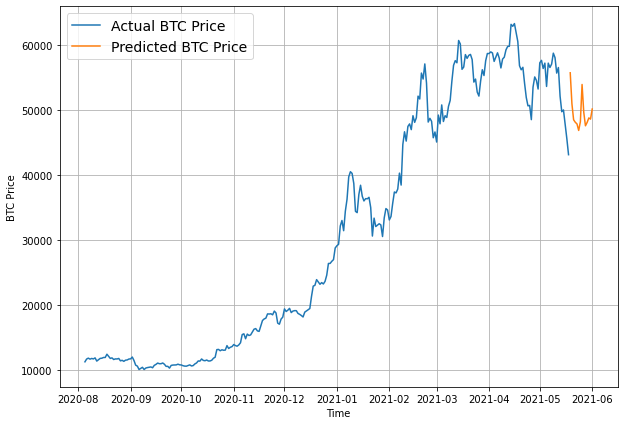

In [244]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))

plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")

plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [245]:
# Insert last timestep/final prices into next time steps and future forecasts so the plot doesn't look janky

next_time_steps = np.insert(next_time_steps, 0, last_timestep)

future_forecast = np.insert(future_forecast, 0, btc_price[-1])

next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.465, 50985.945, 48522.965, 48137.203, 47880.637,
        46879.72 , 48227.6  , 53963.69 , 49685.56 , 47596.176, 48114.43 ,
        48808.008, 48623.855, 50178.723], dtype=float32))

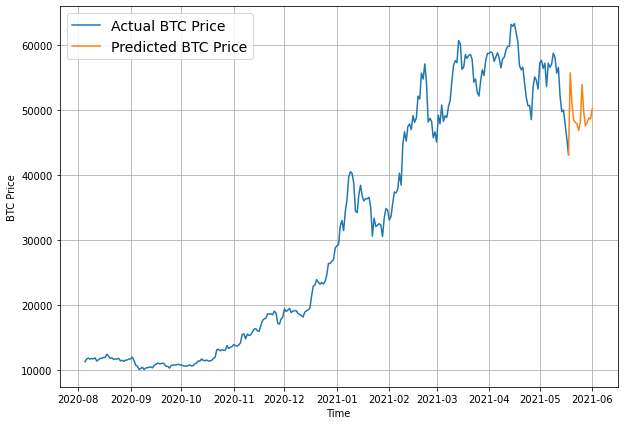

In [246]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))

plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")

plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS( the turkey problem)

In [252]:
# Let's introduce a turkey problem to our BTC data ( price of BTC fall 100x in one day)

btc_price_turkey  = btc_price.copy()

btc_price_turkey[-1] = btc_price_turkey[-1]/ 100

In [249]:
len(btc_price_turkey)

2787

In [250]:
2787/365

7.635616438356164

In [253]:
# Manufacture an extra price on the end (to showcase our Turkey problem)


btc_price_turkey[-10:]



[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [255]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [256]:
# Get the timesteps for the turkey problem

btc_timesteps_turkey = np.array(bitcoin_prices.index)

btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

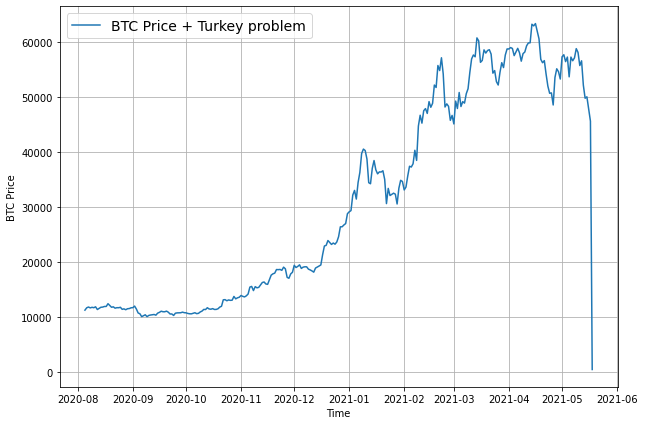

In [257]:
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",

                 start = 2500
                 )

In [276]:
HORIZON= 1
WINDOW_SIZE = 7

In [277]:
# Create train and tests sets for turkey problem data

full_windows,  full_labels = make_windows(np.array(btc_price_turkey),window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)


In [261]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

TypeError: ignored

In [262]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [263]:
full_windows,  full_labels = make_windows(np.array(btc_price_turkey),window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)


TypeError: ignored

In [264]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [265]:


# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]



[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [266]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [278]:
# Create train and test sets for turkey problem data
btc_price_turkey = np.array(btc_price_turkey)
full_windows, full_labels = make_windows(btc_price_turkey, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [279]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


###  Build a turkey model (model to predict on turkey data)


In [281]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data

turkey_model = tf.keras.models.clone_model(model_1)

turkey_model._name = "model_10_turkey_model"

turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

        

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:

In [282]:
# Evaluate model on test data

turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 683.6700


683.6699829101562

In [283]:
# Load best perfoming turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")


turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 649.7197


649.7197265625

In [284]:
# Make predictions with turkey model

turkey_preds = make_preds(turkey_model, X_test)

turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8856.713, 8755.526, 9025.787, 8755.842, 8725.873, 8750.885,
       8695.316, 8469.947, 8474.646, 8516.992], dtype=float32)>

In [285]:
# Evaluate turkey preds

turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)


turkey_results                               

{'mae': 17130.62,
 'mape': 121.37143,
 'mase': 26.509686,
 'mse': 614511400.0,
 'rmse': 23716.344}

In [286]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

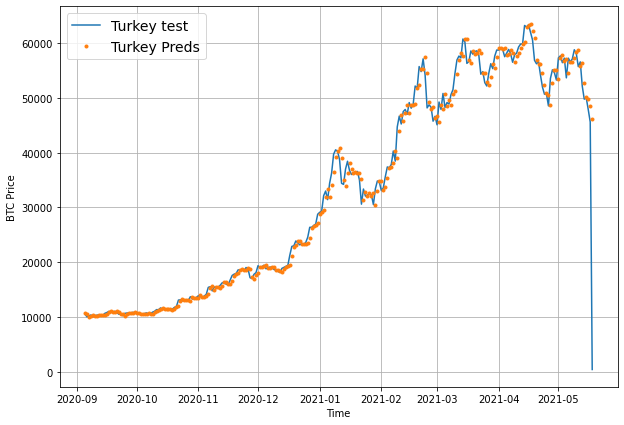

In [287]:
plt.figure(figsize=(10,7))

offset=300

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey test",start=offset)

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

### Compare models 

In [292]:
# Compare different model results (w = window, h =horizon, e.g w=7 means a window size of 7)

model_results =pd.DataFrame({"naive_model": naive_results,
                "model_1_dense_w7_h1": model_1_results,
                "model_2_dense_w30_h1": model_2_results,
                "model_3_dense_w30_h7": model_3_results,
                "model_4_CONV1D": model_4_results,
                "model_5_LSTM": model_5_results,
                "model_6_multivariate": model_6_results,
                "model_7_NBEATS": model_7_results,
                "model_8_ensemble" : ensemble_results,
                "model_10_turkey": turkey_results}).T



model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951233,1.171744e+06,1082.471313,2.544898,0.999490
model_2_dense_w30_h1,608.961487,1.281439e+06,1132.006470,2.769339,1.064471
model_3_dense_w30_h7,1237.506348,5.405198e+06,1425.747681,5.558878,2.202074
model_4_CONV1D,570.828430,1.176671e+06,1084.744751,2.559336,1.002787
model_5_LSTM,585.010376,1.226452e+06,1107.452759,2.628294,1.027701
model_6_multivariate,567.586304,1.161687e+06,1077.816040,2.541375,0.997092
model_7_NBEATS,578.706787,1.164776e+06,1079.247925,2.640929,1.016628
model_8_ensemble,563.336304,1.141446e+06,1068.384644,2.563549,0.989626
model_10_turkey,17130.619141,6.145114e+08,23716.343750,121.371429,26.509686


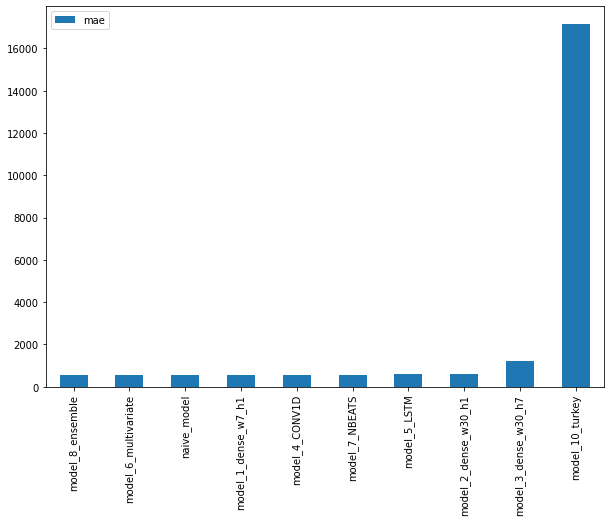

In [293]:
# Sort model results by MAE and plot them

model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")